# <font color = #E55604 size = 10><b> Artificial Neural Network (ANN) VS Convolutional Neural Network (CNN) </b></font>
<font color = #219C90 size = 5> Using both **ANN** and **CNN** on **Digits Mnist dataset**. Want to know more **<font color = #45FFCA>__[Click Here](https://en.wikipedia.org/wiki/MNIST_database)__** </font></font>

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import os
import seaborn as sns
import time

In [9]:
print(tf.__version__)
print(os.getcwd())

2.13.0
D:\ML Project\ANN


In [4]:
tf.config.list_physical_devices("GPU")

[]

In [5]:
tf.config.list_physical_devices("CPU")

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]

In [11]:
mnist = tf.keras.datasets.mnist
(x_train_full, y_train_full) , (x_test, y_test) = mnist.load_data()

In [12]:
# skrkfksg
x_train_full.shape

(60000, 28, 28)

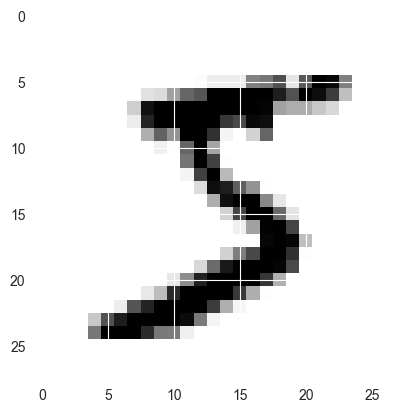

In [8]:
plt.imshow(x_train_full[0], cmap="binary")
plt.show()

In [9]:
x_train_full[0] # one image

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [10]:
y_train_full[0]

5

In [11]:
x_valid, x_train = x_train_full[:5000]/255, x_train_full[5000:]/255
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

x_test = x_test/255

In [12]:
LAYERS = [
    tf.keras.layers.Flatten(input_shape=[28,28],name="inputLayer"),
    tf.keras.layers.Dense(300,activation="relu",name="hiddenLayer1"),
    tf.keras.layers.Dense(100,activation="relu",name="hiddenLayer2"),
    tf.keras.layers.Dense(10,activation="softmax",name="outputLayer")
]

model = tf.keras.models.Sequential(LAYERS)

In [13]:
model.layers

In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inputLayer (Flatten)        (None, 784)               0         
                                                                 
 hiddenLayer1 (Dense)        (None, 300)               235500    
                                                                 
 hiddenLayer2 (Dense)        (None, 100)               30100     
                                                                 
 outputLayer (Dense)         (None, 10)                1010      
                                                                 
Total params: 266610 (1.02 MB)
Trainable params: 266610 (1.02 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [15]:
input_layer = model.layers[0]

In [16]:
input_layer.get_weights()

[]

In [17]:
hidden1 = model.layers[1]

In [18]:
hidden1.get_weights()

[array([[-0.06529213, -0.05314041,  0.06449938, ..., -0.04947804,
         -0.06064735, -0.06051439],
        [ 0.04829732, -0.04740255,  0.00456358, ...,  0.04087346,
         -0.01667427,  0.06544478],
        [ 0.0266077 ,  0.04074362, -0.009618  , ...,  0.00197683,
         -0.02948574,  0.04160929],
        ...,
        [-0.05206658,  0.0590767 ,  0.06252192, ..., -0.00979901,
          0.04257333,  0.04860571],
        [-0.00895104, -0.03993364, -0.02997626, ..., -0.05484782,
         -0.06109839, -0.04798774],
        [-0.03329181,  0.02928554, -0.06075848, ..., -0.01850012,
         -0.07050073, -0.06418104]], dtype=float32),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.

In [19]:
loss_function = "sparse_categorical_crossentropy"
OPTIMIZER = tf.keras.optimizers.SGD(learning_rate=0.001)
METRICS = ["accuracy"]

In [20]:
model.compile(
    loss=loss_function,
    optimizer=OPTIMIZER,
    metrics=METRICS
)

In [21]:
def get_log_path(log_dir="logs/fit"):
    filename = time.strftime("1_log_%y_%m_%d_%H_%M_%S")
    logs_path = os.path.join(log_dir,filename)
    print(f"Saving logs at {logs_path}")
    return logs_path

In [22]:
log_dirs = get_log_path()
tb_cb = tf.keras.callbacks.TensorBoard(log_dir=log_dirs)

Saving logs at logs/fit\1_log_23_09_18_12_09_45


In [23]:
early_stopping_cb = tf.keras.callbacks.EarlyStopping(patience=5, restore_best_weights=True)

In [24]:
CKPT_path = os.path.join("Models","Model_ckpt_Digit_mnist_1.h5")
checkpoint_cb = tf.keras.callbacks.ModelCheckpoint(CKPT_path, save_best_only=True)

In [25]:
EPOCHS = 30
VALIDATION_SET = (x_valid,y_valid)

In [26]:
history = model.fit(x_train,y_train,epochs=EPOCHS,validation_data=VALIDATION_SET,batch_size=64,callbacks=[tb_cb,early_stopping_cb,checkpoint_cb])

Epoch 1/30
860/860 [==============================] - 4s 4ms/step - loss: 2.0174 - accuracy: 0.4011 - val_loss: 1.7331 - val_accuracy: 0.6364
Epoch 2/30
 32/860 [>.............................] - ETA: 2s - loss: 1.7374 - accuracy: 0.6333

D:\ML Project\ANN\venv\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


860/860 [==============================] - 3s 3ms/step - loss: 1.4715 - accuracy: 0.7115 - val_loss: 1.2059 - val_accuracy: 0.7720
Epoch 3/30
860/860 [==============================] - 3s 4ms/step - loss: 1.0351 - accuracy: 0.7936 - val_loss: 0.8708 - val_accuracy: 0.8184
Epoch 4/30
860/860 [==============================] - 3s 4ms/step - loss: 0.7860 - accuracy: 0.8279 - val_loss: 0.6920 - val_accuracy: 0.8414
Epoch 5/30
860/860 [==============================] - 3s 4ms/step - loss: 0.6496 - accuracy: 0.8479 - val_loss: 0.5883 - val_accuracy: 0.8580
Epoch 6/30
860/860 [==============================] - 3s 4ms/step - loss: 0.5675 - accuracy: 0.8618 - val_loss: 0.5226 - val_accuracy: 0.8710
Epoch 7/30
860/860 [==============================] - 3s 4ms/step - loss: 0.5136 - accuracy: 0.8706 - val_loss: 0.4773 - val_accuracy: 0.8796
Epoch 8/30
860/860 [==============================] - 3s 3ms/step - loss: 0.4757 - accuracy: 0.8768 - val_loss: 0.4447 - val_accuracy: 0.8844
Epoch 9/30
860/86

<Axes: >

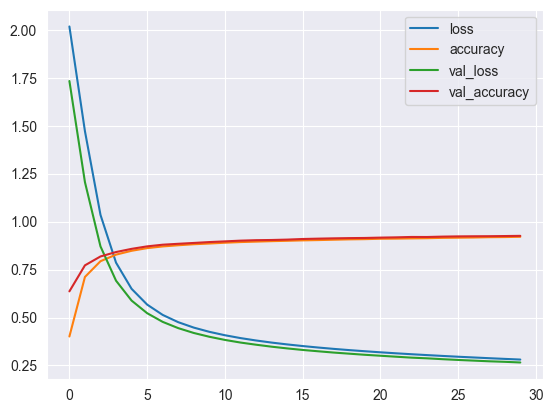

In [27]:
pd.DataFrame(history.history).plot()

In [28]:
pd.DataFrame(history.history)

,loss,accuracy,val_loss,val_accuracy
0,2.017428,0.401127,1.733096,0.6364
1,1.471451,0.711509,1.205875,0.7720
2,1.035121,0.793618,0.870753,0.8184
3,0.785971,0.827855,0.691960,0.8414
4,0.649563,0.847909,0.588294,0.8580
5,0.567465,0.861764,0.522615,0.8710
6,0.513637,0.870600,0.477343,0.8796
7,0.475661,0.876764,0.444677,0.8844
8,0.447436,0.882073,0.419413,0.8888
9,0.425441,0.885800,0.399677,0.8934


In [29]:
ckpt_model = tf.keras.models.load_model(CKPT_path)
ckpt_model.evaluate(x_test,y_test)
#history = ckpt_model.fit(x_train,y_train,epochs=5,validation_data = VALIDATION_SET,callbacks=[tb_cb,early_stopping_cb,checkpoint_cb])

313/313 [==============================] - 1s 3ms/step - loss: 0.2715 - accuracy: 0.9245


[0.2714895009994507, 0.9244999885559082]

<Axes: >

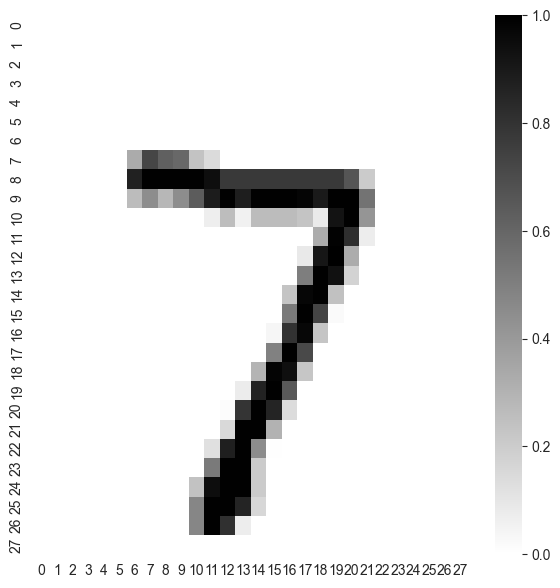

In [30]:
plt.figure(figsize=(7,7))
sns.heatmap(x_test[0],annot=False,cmap="binary")

In [31]:
y_prob = ckpt_model.predict(x_test[:1])
y_prob.round(3)

1/1 [==============================] - 0s 117ms/step


array([[0.001, 0.   , 0.001, 0.003, 0.   , 0.   , 0.   , 0.994, 0.   ,
        0.002]], dtype=float32)

In [32]:
y_predict = np.argmax(y_prob,axis=-1)
print(y_predict)

[7]


In [33]:
del model
del ckpt_model

In [34]:
from keras.models import Sequential
from keras.layers import Dense,Flatten,BatchNormalization,Dropout,LeakyReLU
from keras import regularizers

In [35]:
model = Sequential()
model.add(Flatten(input_shape=[28,28]))
model.add(Dense(units=256,kernel_regularizer=regularizers.L1L2(0.0001,0.0001)))
model.add(BatchNormalization())
model.add(LeakyReLU())
model.add(Dropout(0.1))
model.add(Dense(units=128,kernel_regularizer=regularizers.L1L2(0.0001,0.0001)))
model.add(BatchNormalization())
model.add(LeakyReLU())
model.add(Dropout(0.1))
model.add(Dense(units=64,kernel_regularizer=regularizers.L1L2(0.0001,0.0001)))
model.add(BatchNormalization())
model.add(LeakyReLU())
model.add(Dropout(0.1))
model.add(Dense(units=32,kernel_regularizer=regularizers.L1L2(0.0001,0.0001)))
model.add(BatchNormalization())
model.add(LeakyReLU())
model.add(Dropout(0.1))
model.add(Dense(units=16,kernel_regularizer=regularizers.L1L2(0.0001,0.0001)))
model.add(BatchNormalization())
model.add(LeakyReLU())
model.add(Dropout(0.1))
model.add(Dense(units=10,activation="softmax"))

In [36]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 256)               200960    
                                                                 
 batch_normalization (Batch  (None, 256)               1024      
 Normalization)                                                  
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 256)               0         
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 128)               32896     
                                                      

In [37]:
def get_log_path(log_dir="logs/fit"):
    filename = time.strftime("2_log_%y_%m_%d_%H_%M_%S")
    logs_path = os.path.join(log_dir, filename)
    print(f"Saving logs at {logs_path}")
    return logs_path

log_dirs = get_log_path()
tb_cb = tf.keras.callbacks.TensorBoard(log_dir=log_dirs)

early_stopping_cb = tf.keras.callbacks.EarlyStopping(patience=5, restore_best_weights=True)

CKPT_path = os.path.join("Models","Model_ckpt_Digit_mnist_2.h5")
checkpoint_cb = tf.keras.callbacks.ModelCheckpoint(CKPT_path, save_best_only=True)

EPOCHS = 30
VALIDATION_SET = (x_valid, y_valid)

loss_function = "sparse_categorical_crossentropy"
OPTIMIZER = tf.keras.optimizers.Adam(learning_rate=0.001)
METRICS = ["accuracy"]

model.compile(
    loss=loss_function,
    optimizer=OPTIMIZER,
    metrics=METRICS
)

history = model.fit(x_train, y_train, epochs=EPOCHS, validation_data=VALIDATION_SET, batch_size=64,callbacks=[tb_cb, early_stopping_cb, checkpoint_cb])

Saving logs at logs/fit\2_log_23_09_18_12_13_07
Epoch 1/30
860/860 [==============================] - 10s 8ms/step - loss: 1.1541 - accuracy: 0.8739 - val_loss: 0.6673 - val_accuracy: 0.9458
Epoch 2/30
 16/860 [..............................] - ETA: 6s - loss: 0.7535 - accuracy: 0.9297

D:\ML Project\ANN\venv\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


860/860 [==============================] - 6s 7ms/step - loss: 0.6852 - accuracy: 0.9240 - val_loss: 0.5387 - val_accuracy: 0.9516
Epoch 3/30
860/860 [==============================] - 6s 7ms/step - loss: 0.5891 - accuracy: 0.9304 - val_loss: 0.4788 - val_accuracy: 0.9564
Epoch 4/30
860/860 [==============================] - 6s 7ms/step - loss: 0.5393 - accuracy: 0.9357 - val_loss: 0.4536 - val_accuracy: 0.9564
Epoch 5/30
860/860 [==============================] - 6s 7ms/step - loss: 0.5051 - accuracy: 0.9388 - val_loss: 0.4055 - val_accuracy: 0.9638
Epoch 6/30
860/860 [==============================] - 6s 7ms/step - loss: 0.4862 - accuracy: 0.9411 - val_loss: 0.4243 - val_accuracy: 0.9538
Epoch 7/30
860/860 [==============================] - 6s 7ms/step - loss: 0.4673 - accuracy: 0.9438 - val_loss: 0.3919 - val_accuracy: 0.9626
Epoch 8/30
860/860 [==============================] - 6s 7ms/step - loss: 0.4520 - accuracy: 0.9437 - val_loss: 0.3715 - val_accuracy: 0.9640
Epoch 9/30
860/86

<Axes: >

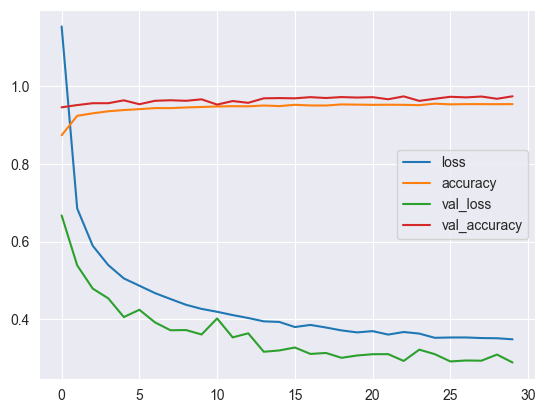

In [38]:
pd.DataFrame(history.history).plot()

In [39]:
ckpt_model = tf.keras.models.load_model(CKPT_path)
ckpt_model.evaluate(x_test,y_test)

313/313 [==============================] - 3s 6ms/step - loss: 0.2807 - accuracy: 0.9744


[0.2807265520095825, 0.974399983882904]

In [40]:
del model
del ckpt_model

In [41]:
model = Sequential()
model.add(Flatten(input_shape=[28,28]))
model.add(Dense(units=256,kernel_regularizer=regularizers.L1L2(0.0001,0.0001),kernel_initializer=tf.keras.initializers.HeNormal(seed=42)))
model.add(BatchNormalization())
model.add(LeakyReLU())
model.add(Dropout(0.1))
model.add(Dense(units=128,kernel_regularizer=regularizers.L1L2(0.0001,0.0001),kernel_initializer=tf.keras.initializers.HeNormal(seed=42)))
model.add(BatchNormalization())
model.add(LeakyReLU())
model.add(Dropout(0.1))
model.add(Dense(units=64,kernel_regularizer=regularizers.L1L2(0.0001,0.0001),kernel_initializer=tf.keras.initializers.HeNormal(seed=42)))
model.add(BatchNormalization())
model.add(LeakyReLU())
model.add(Dropout(0.1))
model.add(Dense(units=32,kernel_regularizer=regularizers.L1L2(0.0001,0.0001),kernel_initializer=tf.keras.initializers.HeNormal(seed=42)))
model.add(BatchNormalization())
model.add(LeakyReLU())
model.add(Dropout(0.1))
model.add(Dense(units=16,kernel_regularizer=regularizers.L1L2(0.0001,0.0001),kernel_initializer=tf.keras.initializers.HeNormal(seed=42)))
model.add(BatchNormalization())
model.add(LeakyReLU())
model.add(Dropout(0.1))
model.add(Dense(units=10,activation="softmax"))

In [42]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_6 (Dense)             (None, 256)               200960    
                                                                 
 batch_normalization_5 (Bat  (None, 256)               1024      
 chNormalization)                                                
                                                                 
 leaky_re_lu_5 (LeakyReLU)   (None, 256)               0         
                                                                 
 dropout_5 (Dropout)         (None, 256)               0         
                                                                 
 dense_7 (Dense)             (None, 128)               32896     
                                                      

In [43]:
def get_log_path(log_dir="logs/fit"):
    filename = time.strftime("3_log_%y_%m_%d_%H_%M_%S")
    logs_path = os.path.join(log_dir, filename)
    print(f"Saving logs at {logs_path}")
    return logs_path

log_dirs = get_log_path()
tb_cb = tf.keras.callbacks.TensorBoard(log_dir=log_dirs)

early_stopping_cb = tf.keras.callbacks.EarlyStopping(patience=5, restore_best_weights=True)

CKPT_path = os.path.join("Models","Model_ckpt_Digit_mnist_3.h5")
checkpoint_cb = tf.keras.callbacks.ModelCheckpoint(CKPT_path, save_best_only=True)

EPOCHS = 30
VALIDATION_SET = (x_valid, y_valid)

loss_function = "sparse_categorical_crossentropy"
OPTIMIZER = tf.keras.optimizers.Adam(learning_rate=0.001)
METRICS = ["accuracy"]

model.compile(
    loss=loss_function,
    optimizer=OPTIMIZER,
    metrics=METRICS
)

history = model.fit(x_train, y_train, epochs=EPOCHS, validation_data=VALIDATION_SET, batch_size=64,callbacks=[tb_cb, early_stopping_cb, checkpoint_cb])

Saving logs at logs/fit\3_log_23_09_18_12_18_01
Epoch 1/30
860/860 [==============================] - 23s 19ms/step - loss: 1.4583 - accuracy: 0.8083 - val_loss: 0.7820 - val_accuracy: 0.9396
Epoch 2/30
  1/860 [..............................] - ETA: 17s - loss: 0.9843 - accuracy: 0.8750

D:\ML Project\ANN\venv\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


860/860 [==============================] - 15s 18ms/step - loss: 0.8705 - accuracy: 0.8925 - val_loss: 0.6217 - val_accuracy: 0.9484
Epoch 3/30
860/860 [==============================] - 14s 17ms/step - loss: 0.7434 - accuracy: 0.9062 - val_loss: 0.5485 - val_accuracy: 0.9534
Epoch 4/30
860/860 [==============================] - 15s 17ms/step - loss: 0.6679 - accuracy: 0.9153 - val_loss: 0.4974 - val_accuracy: 0.9610
Epoch 5/30
860/860 [==============================] - 15s 17ms/step - loss: 0.6294 - accuracy: 0.9213 - val_loss: 0.5185 - val_accuracy: 0.9492
Epoch 6/30
860/860 [==============================] - 15s 17ms/step - loss: 0.6056 - accuracy: 0.9237 - val_loss: 0.4654 - val_accuracy: 0.9606
Epoch 7/30
860/860 [==============================] - 15s 17ms/step - loss: 0.5849 - accuracy: 0.9269 - val_loss: 0.4502 - val_accuracy: 0.9600
Epoch 8/30
860/860 [==============================] - 15s 17ms/step - loss: 0.5720 - accuracy: 0.9287 - val_loss: 0.4417 - val_accuracy: 0.9614
Epo

In [44]:
ckpt_model = tf.keras.models.load_model(CKPT_path)
ckpt_model.evaluate(x_test, y_test)

313/313 [==============================] - 2s 5ms/step - loss: 0.3604 - accuracy: 0.9682


[0.36044567823410034, 0.9682000279426575]

In [45]:
# %load_ext tensorboard
# %tensorboard --logdir logs/fit

Launching TensorBoard...